**Project Overview 專案概述**<p>
This notebook demonstrates how machine learning techniques can be applied to hotel performance data to support operational and pricing decisions. The analysis is based on a synthetic dataset simulating one year (365 days) of hotel operations, including room nights sold, average daily rates (ADR), occupancy, and revenue across three market segments: FIT, GIT, and Corporate.</br>
- Project Sections:
    - Regression: Predicting Hotel Performance</br>
      Using room night sold, day characteristics, and occupancy rate to predict total daily revenue. Models used: Multiple Linear Regression and Random Forest Regression.</br>
      → The predicted revenue is then used to calculate ADR and RevPAR, supporting pricing analysis for future dates.</br>
    - Classification: Predicting Occupancy Levels</br>
      Using calendar-based features and special event indicators to classify whether a day will have high or low occupancy.</br>
      → The goal is to support future pricing strategies by identifying and focusing on days that are more likely to have low occupancy.</br>
    - Clustering: Grouping Day Types for Pricing Tiers</br>
      Applying K-Means clustering to evaluate whether the current day type classification (Weekday, Peak, Holiday) is sufficient or if more refined pricing tiers can be identified based on booking and rate patterns.</br>
      → This aims to support pricing strategy optimization and help maximize revenue by tailoring rates to more granular day types.</br>
- Column Definition:</br>
    - `date`: Calender date in 2023 (used to derive day and month values)</br>
    - `dayofweek`: Day name (e.g., Monday–Sunday)</br>
    - `daytype`: Weekday, Peak, or Holiday</br>
        - Peak includes Fridays to Sundays, the day before a holiday, the last day of a holiday, and one-day holiday.</br>
        - Holiday refers to holidays that span more than one day, typically combining with a weekend. One-day holidays are not labeled as "Holiday" in this field.</br>
    - `special_event`: Indicates whether a special event occurs (negative, none, or positive)</br>
    - `rn_fit`, `rn_git`, `rn_corp`: Room nights sold in FIT(Free Independent Traveler), GIT(Group Inclusive Tour), Corporate market segments</br>
    - `adr_fit`, `adr_git`, `adr_corp`: Average Daily Rate (ADR) in each market segments</br>
    - `rev_fit`, `rev_git`, `rev_corp`: Revenue generated in each market segments</br>
    - `occ`: Occupancy rate (percentage)</br>
    - `rn_ttl`, `adr_ttl`, `rev_ttl`: Total values across all market segments</br>
- Notes:</br>
    - `ADR = Revenue / Room Nights`</br>
    - `RevPAR = ADR * Occupancy`<p>

本專案展示了如何運用機器學習技術分析飯店績效資料，以支援營運和訂價決策。本分析使用模擬飯店一整年的營運情形(365天)的合成資料，內容包含各市場(散客、團客、商務)的房晚數(room nights)、日均房價(ADR)、住房率(occupancy)與營收(revenue)。</br>

- 專案內容：</br>
    - 迴歸分析：預測飯店績效</br>
        使用房晚數、日期特徵、住房率等變數預測每日總營收。使用模型為：多元線性迴歸（MLR）與隨機森林迴歸（RFR）。</br>
        → 預測之營收進一步用來計算ADR與RevPAR，作為未來定價分析之參考。</br>
    - 分類分析：預測住房率高低</br>
        使用日曆相關特徵與特殊事件指標，判斷某日是否為高或低住房率日。</br>
        → 目的是協助未來價格策略，針對潛在住房率偏低日進行提前規劃。</br>
    - 分群分析：日別劃分以做為訂價層級參考</br>
        運用K-Means分群分析評估現有的日別分類(平日、尖峰、假日)是否足夠，或是否應依據訂房與房價模式進行更細緻的分群。</br>
        → 目標為優化訂價策略，依照更細緻的日別群組制定更適切的價格。</br>
- 欄位說明：</br>
    - `date`: 2023年日期(用以推導月份與日期)</br>
    - `dayofweek`: 星期幾(例如：星期一～星期日)</br>
    - `daytype`: 日別，平日、旺日、假日</br>
        - 旺日包含星期五至星期日、假日前一天、假期最後一天、與單日假日</br>
        - 假日 指連續假期(不包含只有一天的國定假日)</br>
    - `special_event`: 是否有特殊事件(負面、無、正面)</br>
    - `rn_fit, rn_git, rn_corp`: 各市場FIT(散客)、GIT(團客)、Corp(商務)房晚數</br>
    - `adr_fit, adr_git, adr_corp`: 各市場平均房價(ADR)</br>
    - `rev_fit, rev_git, rev_corp`: 各市場營收</br>
    - `occ`: 房間住房率（百分比）</br>
    - `rn_ttl, adr_ttl, rev_ttl`: 所有市場的總計數值</br>
- 備註：</br>
    - `平均房價 = 營收 / 房晚數`</br>
    - `RevPAR = 平均房價 * 住房率`<p>

**Data Preparation and Exploration 資料處理與探索**<p>
- Imported necessary libraries and loaded the dataset. Displayed `.head()` and `.info()` for a quick overview of data structure and types.</br>
- Examined the distribution of `daytype` and `special_event` using `.value_counts()`.</br>
- Extracted `month` and `day` from the `date` column, then dropped the original `date` to avoid redundancy.</br>
- Created boxplots to visualize the distribution of ADR and occupancy across `daytype` and `special_event`.</br>
- Applied one-hot encoding to `dayofweek`, `daytype`, and `special_event`, then saved the encoded version as `hotel_encoded` to preserve the original dataset (`hotel`).</br>
- Dropped baseline categories (`Sunday`, `Weekday`) from encoded features to reduce redundancy, and removed unused columns to simplify the feature set.</br>
- Created a feature correlation heatmap using `hotel_encoded` to assess relationships between variables and check for multicollinearity.<p>

- 匯入必要函式庫與讀取資料，透過`.head()`與`.info()`快速了解資料結構與型態。</br>
- 使用`.value_counts()`檢視`daytype`與`special_event`的分布。</br>
- 從`date`欄位擷取`month`與`day`欄位，並刪除原始`date`避免重複。</br>
- 利用合鬚圖視覺化平均房價與住房率在不同`daytype`與`special_event`下的分布。</br>
- 對`dayofweek`、`daytype`與`special_event`欄位進行One-Hot Encoding，將編碼結果另存為`hotel_encoded`以保留原始資料。</br>
- 刪除基準類別(如`Sunday`、`Weekday`)與不必要欄位以簡化特徵。</br>
- 利用`hotel_encoded`繪製相關係數熱力圖以了解變數間關係。<p>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import tree

hotel = pd.read_csv('Mock_Hotel_daily.csv')

###Understanding the data
print(hotel.head())
print(hotel.info())
print(hotel.daytype.value_counts(dropna=False))
print(hotel.special_event.value_counts(dropna=False))

       date dayofweek  daytype special_event  rn_fit  rn_git  rn_corp  \
0  2023/1/1       Sun  holiday           NaN     227      11        2   
1  2023/1/2       Mon     peak           NaN     114       1        7   
2  2023/1/3       Tue  weekday           NaN      59       8       11   
3  2023/1/4       Wed  weekday           NaN      59       0       15   
4  2023/1/5       Thu  weekday           NaN      62      70       17   

   adr_fit  adr_git  adr_corp  rev_fit  rev_git  rev_corp  rn_ttl  adr_ttl  \
0    12956     8190      2028  2940985    90089      4055     240    12646   
1     5292     5356      1905   603342     5356     13335     122     5099   
2     3840     2361      2448   226576    18892     26925      78     3492   
3     3846        0      2486   226924        0     37296      74     3571   
4     4371     1939      1818   271014   135750     30910     149     2937   

   rev_ttl  occ  
0  3035128   83  
1   622033   42  
2   272393   27  
3   264220   25  
4 

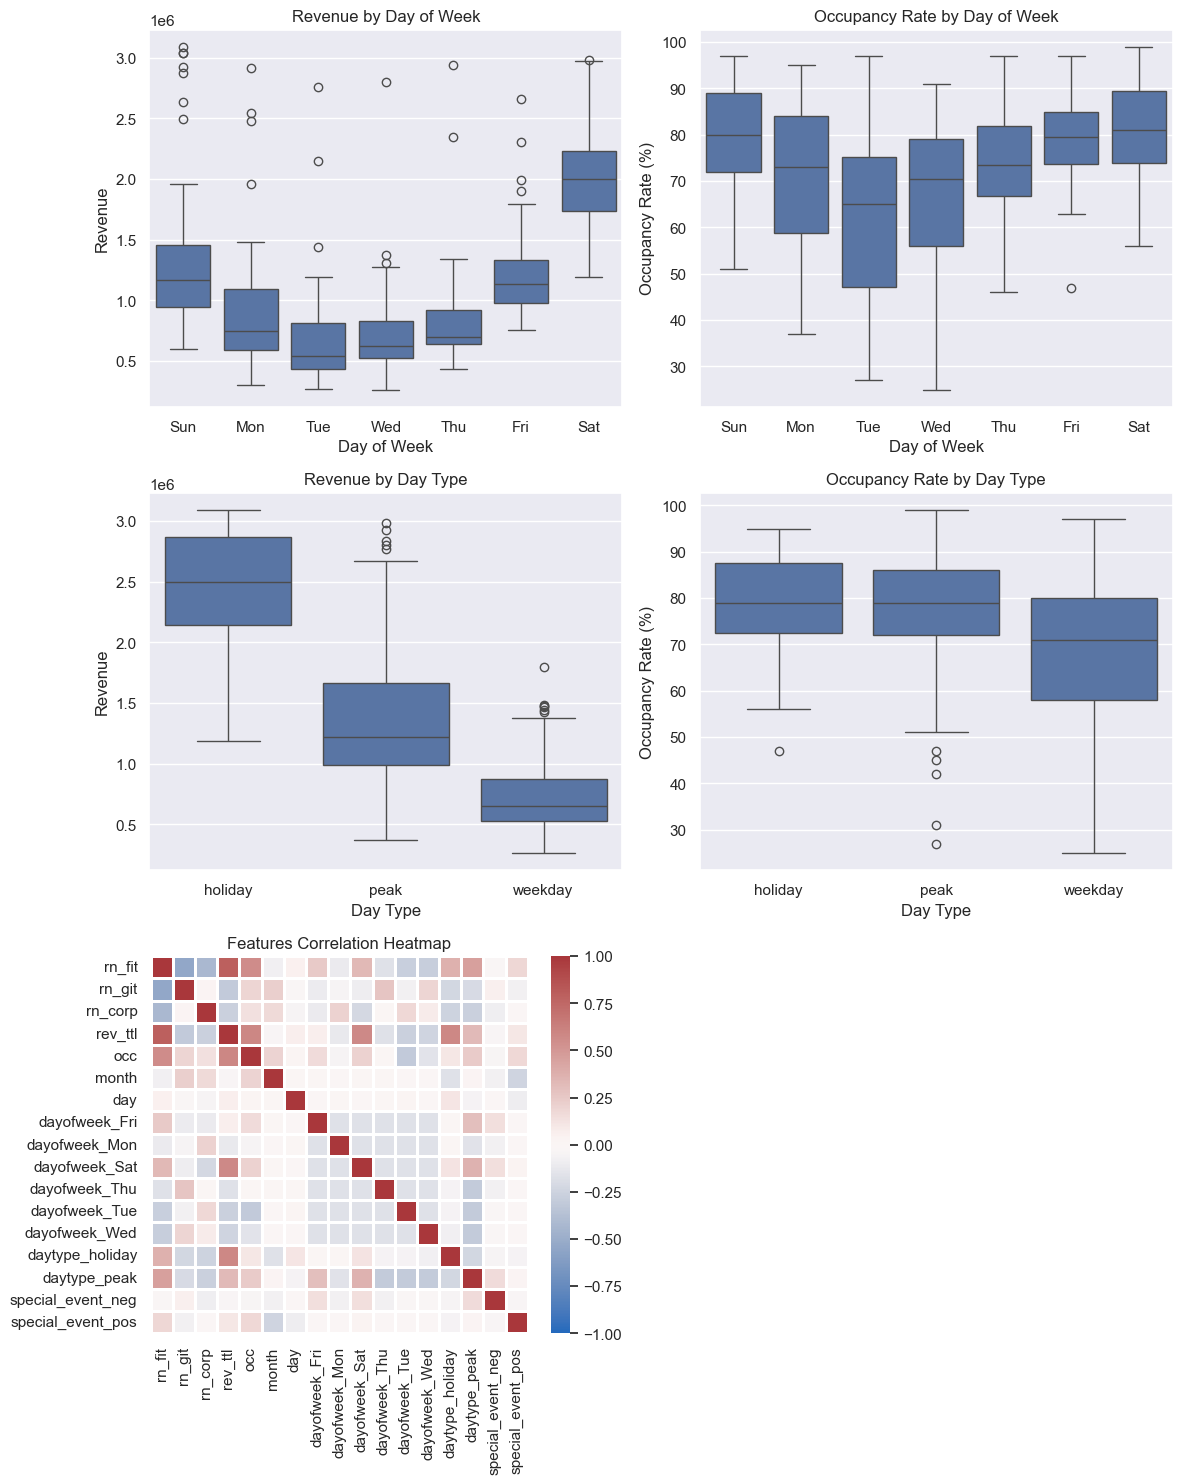

In [5]:
###EDA
hotel['month'] = [x[1] for x in hotel.date.str.split('/')]
hotel['day'] = [x[2] for x in hotel.date.str.split('/')]
hotel = hotel.drop(['date'], axis=1)

fig = plt.figure(figsize=(12, 15))
ax1 = fig.add_subplot(3, 2, 1)
ax1 = sns.boxplot(hotel, x='dayofweek', y='rev_ttl')
ax1 = plt.title('Revenue by Day of Week')
ax1 = plt.xlabel('Day of Week')
ax1 = plt.ylabel('Revenue')
ax2 = fig.add_subplot(3, 2, 2)
ax2 = sns.boxplot(hotel, x='dayofweek', y='occ')
ax2 = plt.title('Occupancy Rate by Day of Week')
ax2 = plt.xlabel('Day of Week')
ax2 = plt.ylabel('Occupancy Rate (%)')
ax3 = fig.add_subplot(3, 2, 3)
ax3 = sns.boxplot(hotel, x='daytype', y='rev_ttl')
ax3 = plt.title('Revenue by Day Type')
ax3 = plt.xlabel('Day Type')
ax3 = plt.ylabel('Revenue')
ax4 = fig.add_subplot(3, 2, 4)
ax4 = sns.boxplot(hotel, x='daytype', y='occ')
ax4 = plt.title('Occupancy Rate by Day Type')
ax4 = plt.xlabel('Day Type')
ax4 = plt.ylabel('Occupancy Rate (%)')

hotel_encoded = pd.get_dummies(data=hotel, columns=['dayofweek', 'daytype', 'special_event'])
hotel_encoded = hotel_encoded.drop(['dayofweek_Sun', 'daytype_weekday', 'adr_fit', 'adr_git', 'adr_corp', 'adr_ttl', 'rn_ttl', 'rev_fit', 'rev_git', 'rev_corp'], axis=1)
corr = hotel_encoded.corr()
ax5 = fig.add_subplot(3, 2, 5)
ax5 = sns.heatmap(corr, cmap='vlag', vmin=-1.0, vmax=1.0, square=True, linecolor='white', linewidths=1.0)
ax5 = plt.title('Features Correlation Heatmap')
plt.tight_layout()
plt.show()

**Section 1. Regression - Predicting Hotel Performance 迴歸分析 - 預測飯店績效**<p>
This section aims to predict daily hotel revenue and use the results to calculate ADR and RevPAR, providing insights for future pricing strategies.</br>
- Based on the correlation heatmap, we removed low-correlation features such as `month`, `day`, and `special_event` to reduce feature dimensionality.</br>
- The target variable (label) is `rev_ttl` (total revenue).</br>
- A reusable function was defined to:</br>
    - Take a model, model name, and new data as input.</br>
    - Predict revenue for the new data.</br>
    - Calculate corresponding ADR and RevPAR values.</br>
- Multiple Linear Regression was chosen for its interpretability:</br>
    - Training Score: 0.884</br>
    - Testing Score: 0.889</br>
- Since patterns in the data may be non-linear, Random Forest Regression was also used to better capture interactions:</br>
    - Training Score: 0.983</br>
    - Testing Score: 0.922</br>
- Both models were used to predict revenue for three new example days:</br>
    - Based on domain experience, predictions from both models are reasonable and consistent.</br>
    - The weekday and peak day predictions are similar, while the holiday prediction shows slightly more divergence, possibly due to the non-linear nature of holiday demand patterns.</br>
    
*Note: `random_state=100` was used for train-test splitting to achieve better generalization in regression. This choice provided higher test performance in Random Forest Regression while keeping MLR scores stable.*<p>

此分析目標為預測每日總營收，並進一步計算平均房價與RevPAR，協助未來定價策略。</br>
- 根據相關係數熱力圖，移除低相關特徵如`month`、`day`、`special_event`以降低特徵維度。</br>
- 目標變數為`rev_ttl`(總營收)。</br>
- 自定函式：</br>
    - 以模型、模型名稱與新資料作為輸入。</br>
    - 預測新資料之營收。</br>
    - 計算對應之ADR與RevPAR。</br>
- 多元線性迴歸具可解釋性：</br>
    - 訓練分數：0.884</br>
    - 測試分數：0.889</br>
- 因資料可能存在非線性關係，使用隨機森林迴歸以捕捉更多交互作用：</br>
    - 訓練分數：0.983</br>
    - 測試分數：0.922</br>
- 兩模型皆用來預測三筆新資料：</br>
    - 預測結果合理且與實務經驗相符。</br>
    - 平日與旺日預測相近，假日預測則稍有差異，可能與假日需求的非線性模式有關。</br>

*註：此部分的train-test split使用`random_state=100`參數，因隨機森林迴歸使用此參數得到較佳測試結果，同時亦維持多元線性迴歸穩定性。*<p>

In [7]:
###Predicting Hotel Performance

#Based on heatmap, removing 'month', 'day', 'special_event' to reduce features. 
X = hotel_encoded[['rn_fit', 'rn_git', 'rn_corp', 'occ', 'dayofweek_Fri', 'dayofweek_Mon', 'dayofweek_Sat', 'dayofweek_Thu',
       'dayofweek_Tue', 'dayofweek_Wed', 'daytype_holiday', 'daytype_peak']].values
y = hotel_encoded[['rev_ttl']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

#Simple function for predicting and calculating stats
def prediction(model, model_name, new_data):
    pred_rev = np.round(model.predict(new_data))
    pred_adr = np.round([pred_rev[i]/(new_data[i][0]+new_data[i][1]+new_data[i][2]) for i in range(len(pred_rev))])
    pred_revpar = np.round([new_data[i][3]*pred_adr[i]*0.01 for i in range(len(pred_rev))])
    table_rev = pd.DataFrame(pred_rev, columns=[f'{model_name}_revenue'])
    table_adr = pd.DataFrame(pred_adr, columns=[f'{model_name}_adr'])
    table_revpar = pd.DataFrame(pred_revpar, columns=[f'{model_name}_revpar'])
    table = pd.concat([table_rev, table_adr, table_revpar], axis=1)
    return table

#Multiple Linear Regression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
print(f'Multiple Linear Regression Train Score: {mlr.score(X_train, y_train), 0}')
print(f'Multiple Linear Regression Test Score: {mlr.score(X_test, y_test), 0}')

#Predicting couple days, 10/22/2024, 06/21/2024, 04/05/2024
new_dates = ['10/22/2024', '06/21/2024', '04/05/2024']
new_days = [[78, 36, 42, 54, 0, 0, 0, 0, 1, 0, 0, 0], 
            [166, 32, 19, 75, 1, 0, 0, 0, 0, 0, 0, 1],
            [202, 21, 16, 83, 0, 0, 0, 0,1, 0, 1, 0]]

mlr_pred = prediction(mlr, 'mlr', new_days)

#Random Forest Regression
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
print(f'Random Forest Regression Train Score: {rfr.score(X_train, y_train)}')
print(f'Random Forest Regression Test Score: {rfr.score(X_test, y_test)}')

#Using same days for predicting
rfr_pred = prediction(rfr, 'rfr', new_days)

new_table = pd.concat([pd.DataFrame(new_dates, columns=['date']), mlr_pred, rfr_pred], axis=1)
new_table

Multiple Linear Regression Train Score: (0.884082350870633, 0)
Multiple Linear Regression Test Score: (0.8896043099824544, 0)
Random Forest Regression Train Score: 0.9830302359296003
Random Forest Regression Test Score: 0.9227359854208844


,date,mlr_revenue,mlr_adr,mlr_revpar,rfr_revenue,rfr_adr,rfr_revpar
0,10/22/2024,496902.0,3185.0,1720.0,509408.0,3265.0,1763.0
1,06/21/2024,1102940.0,5083.0,3812.0,1064626.0,4906.0,3680.0
2,04/05/2024,2323667.0,9722.0,8069.0,2300240.0,9624.0,7988.0


**Section 2. Classification - Predicting Occupancy Levels 分類分析 - 預測住房率高低**</br>
Classify whether a day will have high occupancy (≥60%) or low occupancy (<60%). The goal is to support future pricing strategies by identifying days that are more likely to have low occupancy so that targeted promotional or pricing actions can be taken.</br>
- Since room nights sold directly influence occupancy, we exclude them from features. Instead, we focus on calendar-related features to explore patterns that lead to low occupancy.</br>
- The target variable (label) is a binary indicator based on `occ` (occupancy rate):</br>
    - `occ` ≥ 60% → "we are good"</br>
    - `occ` < 60% → "slow day"</br>
- A Decision Tree is chosen for its interpretability—it helps uncover how combinations of features lead to each occupancy class:</br>
    - Training Score: 0.941</br>
    - Testing Score: 0.808</br>
    - The initial tree was overfitting with more than 10 levels.</br>
- To prune the tree, we tuned key hyperparameters:</br>
    - Best `max_depth`: 4</br>
    - Best `min_samples_leaf`: 2</br>
    - Best `min_samples_split`: typically 2 or 3</br>
- Final Decision Tree Results:</br>
    - Traing Score: 0.842</br>
    - Testing Score: 0.821</br>
- Two notable patterns associated with "slow day":</br>
    - Tuesday at the end of the month.</br>
    - Monday at the beginning of the month.</br>

*Note: `random_state=2` was used because it produced a more interpretable and balanced tree that successfully revealed meaningful patterns in occupancy classification. Other seeds (e.g., 42, 100) did not yield useful results.*<p>

分類某日是否為高住房率(≥60%)或低住房率(<60%)，以在未來針對潛在低住房率的日期，提前採取促銷或價格調整。</br>
- 因住房數直接構成住房率，因此排除該變數，並以日曆特徵為主。</br>
- 目標變數為依據occ所定義之二元類別：</br>
    - `occ` ≥ 60% → “we are good”</br>
    - `occ` < 60% → “slow day”</br>
- 使用決策樹模型，其可解釋性高，並可觀察各節點及特徵如何影響分類結果：</br>
    - 訓練分數：0.941</br>
    - 測試分數：0.808</br>
    - 原始樹超過10層，出現過擬合。</br>
- 經由調參數進行剪枝：</br>
    - 最佳`max_depth`: 4</br>
    - 最佳`min_samples_leaf`: 2</br>
    - 最佳`min_samples_split`: 2或3</br>
- 最終結果：</br>
    - 訓練分數：0.842</br>
    - 測試分數：0.821</br>
- 兩個與低住房率明顯相關的特徵組合：</br>
    - 月底的星期二</br>
    - 月初的星期一</br>

*註：參數`random_state=2`帶來更平衡、具可解釋性的樹結構，其他數值(如42、100)並未能呈現具體結果。*<p>

Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Depth: 17
Train Accuracy: 0.9417808219178082
Test Accuracy: 0.8082191780821918


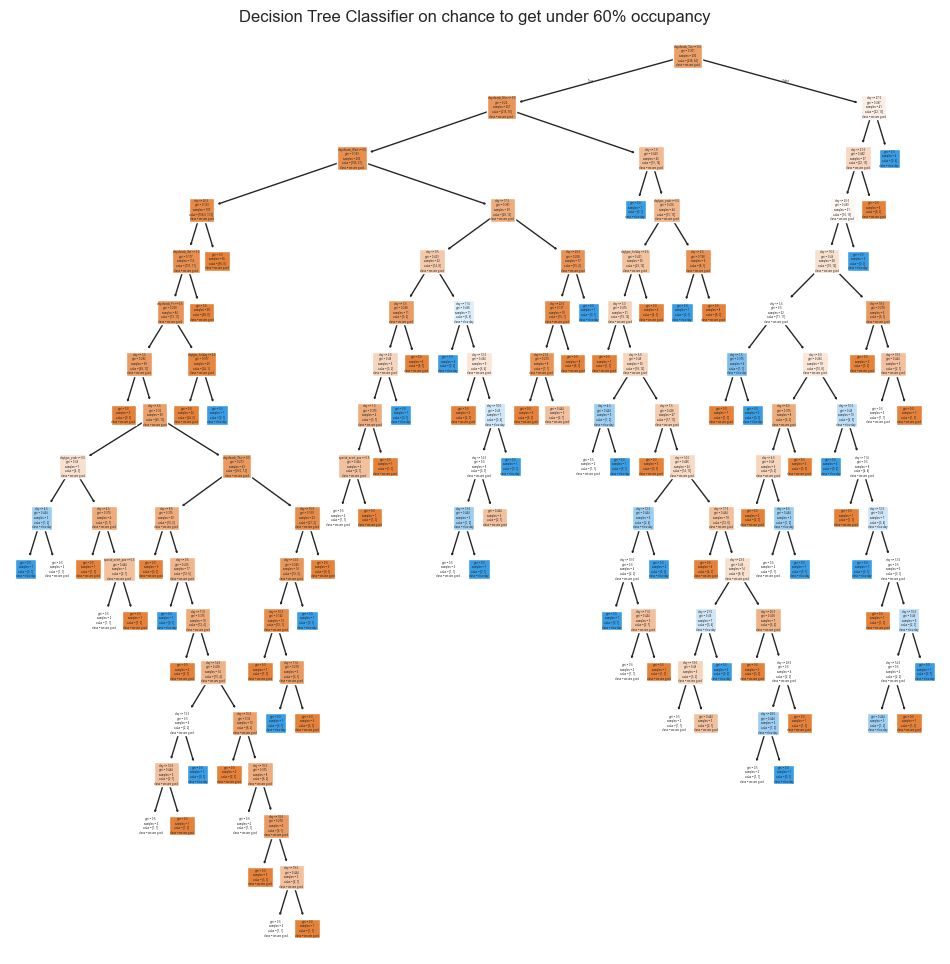

The best test score: 0.8356164383561644 with ccp 0.00270106053910738
DecisionTreeClassifier(ccp_alpha=np.float64(0.00270106053910738), max_depth=4,
                       min_samples_leaf=2, min_samples_split=3)
Best max_depth: 4
Best min_samples_leaf: 2
Best min_samples_split: 3
Best score: 0.8254237288135593
Train Accuracy: 0.8424657534246576
Test Accuracy: 0.821917808219178


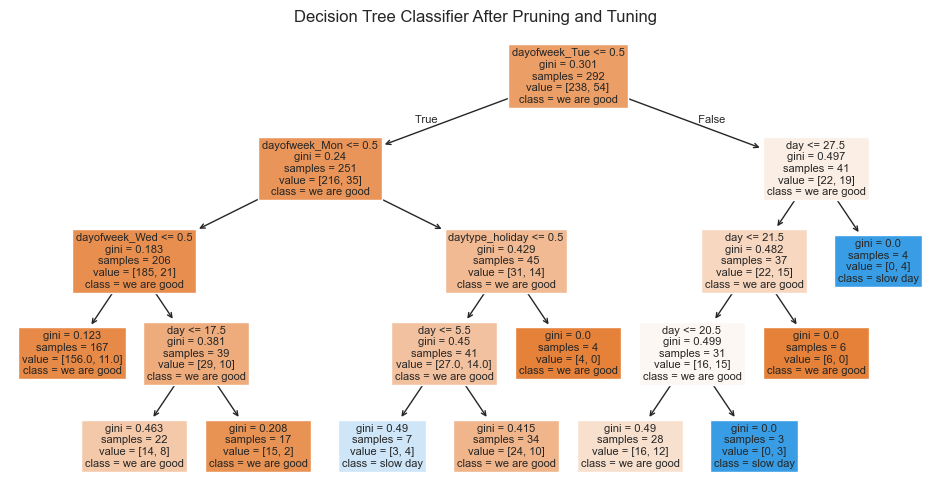

In [9]:
###Predicting Occupancy Levels ('we are good' (≥60%) or 'slow day' (<60%))
X = hotel_encoded[['day', 'dayofweek_Fri', 'dayofweek_Mon', 'dayofweek_Sat', 'dayofweek_Thu',
       'dayofweek_Tue', 'dayofweek_Wed','daytype_holiday', 'daytype_peak', 'special_event_neg', 'special_event_pos']].astype(float).values
y = (hotel_encoded['occ'] < 60).astype(int)
feature_names = ['day', 'dayofweek_Fri', 'dayofweek_Mon', 'dayofweek_Sat', 'dayofweek_Thu',
       'dayofweek_Tue', 'dayofweek_Wed','daytype_holiday', 'daytype_peak', 'special_event_neg', 'special_event_pos']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(f'Parameters: {dt.get_params()}')
print(f'Depth: {dt.get_depth()}')
print(f'Train Accuracy: {dt.score(X_train, y_train)}')
print(f'Test Accuracy: {dt.score(X_test, y_test)}')

plt.figure(figsize=(12, 12))
tree.plot_tree(dt, feature_names = feature_names, class_names = ['we are good', 'slow day'], filled=True)
plt.title('Decision Tree Classifier on chance to get under 60% occupancy')
plt.tight_layout
plt.show()

#Pruning
best_score = 0
best_ccp = 0
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
for i in ccp_alphas:
    dt = DecisionTreeClassifier(ccp_alpha=i)
    dt.fit(X_train, y_train)
    score = dt.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_ccp = i
        
print(f'The best test score: {best_score} with ccp {best_ccp}')

#Tuning
parameters = {'max_depth': range(3, 10), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10)}
dt = DecisionTreeClassifier(ccp_alpha=best_ccp)
gscv= GridSearchCV(dt, parameters)
gscv.fit(X_train, y_train)
print(gscv.best_estimator_)

print('Best max_depth: {}'.format(gscv.best_params_['max_depth']))
print('Best min_samples_leaf: {}'.format(gscv.best_params_['min_samples_leaf']))
print('Best min_samples_split: {}'.format(gscv.best_params_['min_samples_split']))
print('Best score: {}'.format(gscv.best_score_))

#Based on the pruning and Tuning
dt = DecisionTreeClassifier(ccp_alpha=best_ccp, max_depth=gscv.best_params_['max_depth'], min_samples_leaf=gscv.best_params_['min_samples_leaf'], min_samples_split=gscv.best_params_['min_samples_split'])
dt.fit(X_train, y_train)
print(f'Train Accuracy: {dt.score(X_train, y_train)}')
print(f'Test Accuracy: {dt.score(X_test, y_test)}')

plt.figure(figsize=(12, 6))
tree.plot_tree(dt, feature_names = feature_names, class_names = ['we are good', 'slow day'], filled=True)
plt.title(f'Decision Tree Classifier After Pruning and Tuning')
plt.tight_layout
plt.show()


**Section 3. Classification: Grouping Day Types for Pricing Tiers 分群分析 - 日別劃分以做為訂價層級參考**</br>
Currently, we classify days into three types, weekday, peak, and holiday, to set pricing tiers. This section explores whether more granular groupings could better support pricing strategy and revenue maximization. However, to avoid excessive complexity, the number of groups is limited to a maximum of 10.</br>
- We use two core performance metrics, room nights sold (`rn_ttl`) and average daily rate (`adr_ttl`), as clustering features.</br>
- Standardized the features using `StandardScaler` to ensure equal weighting.</br>
- Applied K-Means clustering to group days based on performance.</br>
- Plotted both inertia (to identify the elbow point) and silhouette score (to evaluate clustering quality).</br>
- Results:</br>
    - 4 clusters had the highest silhouette score, though inertia had not yet reached its elbow point.</br>
    - 6 and 8 clusters had relatively high silhouette scores and showed clearer elbows in inertia, suggesting diminishing returns beyond that.</br>
    - Based on domain experience, hotels often operate with 4–8 pricing tiers, so all are viable depending on business preferences.</br>
    - The choice between 4, 6, or 8 clusters depends on the balance between interpretability and pricing precision. While 4 clusters may be easier to implement, 6 or 8 clusters may reveal more nuanced demand patterns that can support finer-grained pricing strategies.</br>

*Note: `random_state=2` was used because it produced a realistic pattern where the silhouette score fluctuates slightly but trends downward, while inertia clearly slows around 6–8 clusters, a common behavior in real-world data.*<p>

目前資料僅將日別劃分為平日、旺日與假日，此分析探討是否應更細分日別以提升訂價策略彈性，最大化收益。考量實務應用限制，群組數上限設定為10。</br>
- 使用兩個核心績效指標作為分群依據：房晚數(`rn_ttl`)與平均房價(`adr_ttl`)。</br>
- 對特徵進行標準化(`StandardScaler`)以確保權重一致。</br>
- 使用K-Means分群演算法進行日別分群。</br>
- 繪製inertia與silhouette分數圖以觀察最佳群組數。</br>
- 結果：</br>
    - 4群有最高的silhouette分數，但inertia尚未達明顯平緩點。</br>
    - 6與8群皆具有相對較高的silhouette分數，並位於inertia平緩點，可做為不錯選項。</br>
    - 根據領域經驗，常見的飯店訂價層級為4–8層，視策略需求皆是可能的調整選項。</br>
    - 選擇4群在操作面上較為簡單，6或8群則可因應需求變動制定更細緻的價格策略。</br>

註：使用`random_state=2`所產生的inertia與silhouette分數趨勢，與常見的真實資料較為一致，因此選用。<p>

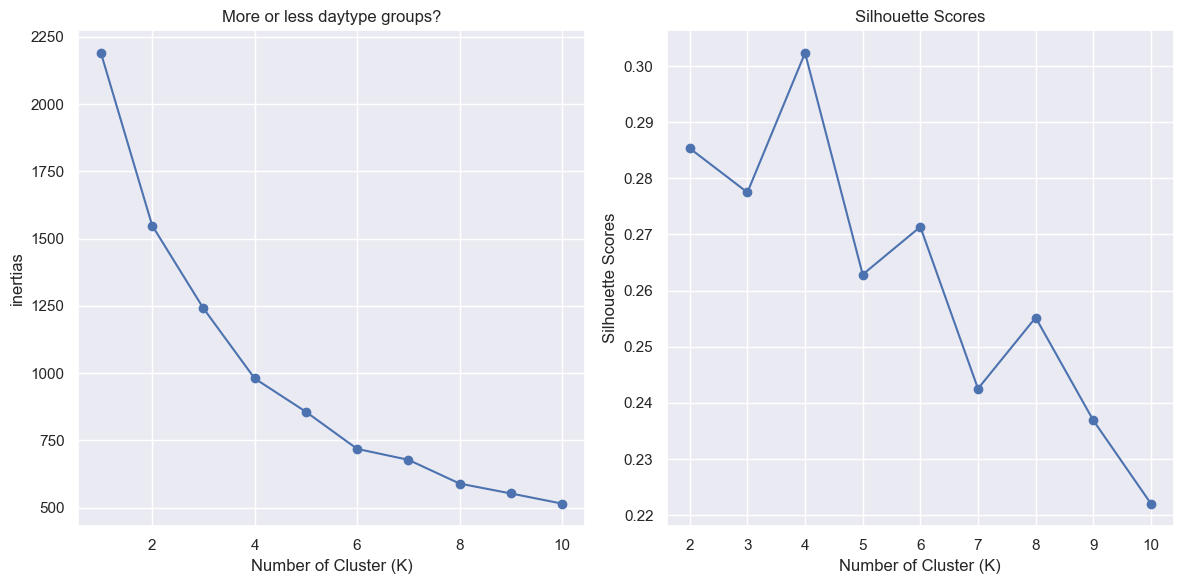

In [11]:
###Grouping Day Types for Pricing Tiers

#Scaling
hotel_km = hotel[['rn_fit', 'rn_git', 'rn_corp', 'adr_fit', 'adr_git', 'adr_corp']]
st_sc = StandardScaler()
st_sc.fit(hotel_km)
hotel_km = st_sc.transform(hotel_km)
num_cluster = range(1, 11)

#K-mean
inertias = []
silhouette_scores = []
for i in num_cluster:
    kmeans = KMeans(n_clusters = i, random_state=2)
    cluster_labels = kmeans.fit_predict(hotel_km)
    inertias.append(kmeans.inertia_)

    if i > 1:
        score = silhouette_score(hotel_km, cluster_labels)
    else:
        score = None
    silhouette_scores.append(score)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax1 = plt.plot(num_cluster, inertias, '-o')
ax1 = plt.title('More or less daytype groups?')
ax1 = plt.xlabel('Number of Cluster (K)')
ax1 = plt.ylabel('inertias')
ax2 = fig.add_subplot(1, 2, 2)
ax2 = plt.plot(num_cluster, silhouette_scores, '-o')
ax2 = plt.title('Silhouette Scores')
ax2 = plt.xlabel('Number of Cluster (K)')
ax2 = plt.ylabel('Silhouette Scores')
plt.tight_layout()
plt.show()


**Conclusion 結論**<p>
- This project applied machine learning techniques to analyze and predict hotel performance, focusing on revenue, occupancy levels, and day-type segmentation.</br>
- Section 1. Regression - Predicting Hotel Performance:</br>
    - Applied Multiple Linear Regression and Random Forest Regression models to predict total daily revenue based on room nights across markets, occupancy, and calendar-related features.</br>
    - Both models achieved good accuracy in predicting total daily revenue, enabling calculation of ADR and RevPAR to support pricing decisions. The predictions aligned well with domain experience.</br>
- Section 2. Classification - Predicting Occupancy Levels:</br>
    - Applied a Decision Tree model to identify factors that may lead to potential low-occupancy days (<60%).</br>
    - Two notable patterns were associated with low occupancy:</br>
        - Tuesday at the end of the month.</br>
        - Monday at the beginning of the month.</br>
    - These findings may support future pricing strategies by prompting extra attention on these potentially weaker days.</br>
    - Currently, the occupancy classification includes all market segments. However, in practice, GIT and Corporate bookings are often used to fill low-demand days and do not follow consistent weekly patterns. Since GIT availability is seasonal and irregular, it may introduce noise into the model. A future version could classify based on FIT-only occupancy or revenue, offering a clearer signal of organic demand and helping determine when GIT/Corp support is needed.</br>
- Section 3. Classification: Grouping Day Types for Pricing Tiers:</br>
    - Applied K-Means clustering to assess whether more granular day-type groupings could better support pricing.</br>
    - Based on inertia and silhouette scores, the ideal number of groups falls between 4 and 8, which aligns with domain experience.</br>
    - For example, Saturday might be separated from other peak days, or seasonal weekday/peak variations could be defined, especially during summer breaks.</br>
    - Reassigning day types could also potentially improve the accuracy of the regression and occupancy classification models.</br>
- Visualizations include correlation heatmaps, decision tree diagrams, and clustering plots (inertia and silhouette scores).</br>
- Overall, the models and insights provide actionable guidance for hotel operations and pricing strategy, with further improvements possible through feature engineering, additional data sources, and deeper model tuning.<p>

- 本專案應用機器學習技術分析並預測飯店績效，重點涵蓋營收預測、住房率分類與日別分群。</br>
- 第一部分：迴歸分析 - 預測飯店績效</br>
    - 使用多元線性與隨機森林迴歸預測每日總營收，依據房晚數、住房率與日期特徵建模。</br>
    - 兩個模型都能精準預測每日營收，並進一步計算ADR與RevPAR，結果符合領域經驗。</br>
- 第二部分：分類分析 - 預測住房率高低</br>
    - 使用決策樹判斷潛在的低住房率日。</br>
    - 兩個顯著特徵組合：</br>
        - 月底的星期二</br>
        - 月初的星期一。</br>
    - 可作為未來定價策略之參考，針對潛在低需求日提前採取行動。</br>
    - 目前模型納入所有市場資料，未來可考慮僅以散客為主的分類模型，以避免波動高且不穩定的團客與商務市場帶來雜訊，並以此輔助決策某些日期是否需要團客與商務進場。</br>
- 第三部分：分群分析 - 日別劃分以做為訂價層級參考</br>
    - 使用K-Means分群分析探討是否應更細分日別以提升訂價策略。</br>
    - 結果顯示4–8群為合理範圍，符合業界常見層級。</br>
    - 例如可將週六從其他旺日中分離，或進一步於暑假等旺季劃分另一組平日/旺日。</br>
    - 若重新定義日別後，亦可能提升前兩部分模型之預測表現。</br>
- 視覺化成果包含相關係數熱力圖、決策樹圖、inertia與silhouette分數圖。</br>
- 整體模型與分析提供實用建議，並可藉由未來特徵工程、資料擴充與模型優化進一步提升效能。<p>